# Apriori

## Support

**Support** is a key metric, which measures the frequency of an itemset in the dataset. It helps determine which itemsets are frequent enough to be considered for generating association rules.

$$
Support(A) = \frac{Transactions \space containing \space A}{Total \space transactions}
$$

Where:
- $A$ is an itemset (e.g., `{Diapers, Beer}`).
- The numerator represents the number of transactions that contain $A$.
- The denominator represents the total number of transactions in the dataset.


## Confidence

**Confidence** measures the likelihood that an itemset $B$ appears in a transaction, given that the transaction already contains itemset $A$. It represents the **strength of an association rule**.

$$
Confidence(A \rightarrow B) = \frac{Support(A \cup B)}{Support(A)}
$$

Where:
- $A$ is the **antecedent** (e.g., `{Diapers}`).
- $B$ is the **consequent** (e.g., `{Beer}`).
- $Support(A ∪ B)$ represents the number of transactions that contain both $A$ and $B$.
- $Support(A)$ represents the number of transactions that contain $A$.

$Confidence(A  \rightarrow B)$ shows the probability that a transaction containing $A$ also contains $B$.


## Lift

**Lift** measures how much more likely itemset $B$ is to appear in a transaction that already contains itemset $A$, compared to when $B$ appears independently. It helps determine whether an association rule is **significant**.

$$
Lift(A \rightarrow B) = \frac{Confidence(A \rightarrow B)}{Support(B)}
$$

Or equivalently:

$$
Lift(A \rightarrow B) = \frac{Support(A \cup B)}{Support(A) \times Support(B)}
$$

Where:
- $A$ is the **antecedent** (e.g., `{Diapers}`).
- $B$ is the **consequent** (e.g., `{Beer}`).
- $Support(A \cup B)$ represents the number of transactions that contain both $A$ and $B$.
- $Support(A)$ represents the number of transactions that contain $A$.
- $Support(B)$ represents the number of transactions that contain $B$.
- $Confidence(A \rightarrow B)$ is the probability of $B$ appearing given that $A$ is in the transaction.

### Interpretation
- $Lift > 1$ $\rightarrow$ $A$ and $B$ are positively correlated (stronger association than random chance).
- $Lift = 1$ $\rightarrow$ $A$ and $B$ are independent (no association).
- $Lift < 1$ $\rightarrow$ $A$ and $B$ are negatively correlated (less likely to appear together).

Lift helps identify whether an association rule is **truly meaningful** beyond simple co-occurrence.

## Dataset

Each row in the dataset represents a shopping trip made by a different customer. It includes all the items they bought in that transaction, just like a receipt from a store. This helps us understand which products are often purchased together, making it useful for analyzing shopping patterns and creating better recommendations.

In [1]:
%cat '../00_data/Market_Basket_Optimisation.csv'|head

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
burgers,meatballs,eggs
chutney
turkey,avocado
mineral water,milk,energy bar,whole wheat rice,green tea
low fat yogurt
whole wheat pasta,french fries
soup,light cream,shallot
frozen vegetables,spaghetti,green tea
french fries
cat: stdout: Broken pipe


In [2]:
%cat '../00_data/Market_Basket_Optimisation.csv'|tail

herb & pepper
chocolate,escalope
burgers,salmon,pancakes,french fries,frozen smoothie,fresh bread,mint
turkey,burgers,dessert wine,shrimp,pasta,tomatoes,pepper,milk,pancakes,whole wheat rice,oil,frozen smoothie
pancakes,light mayo
butter,light mayo,fresh bread
burgers,frozen vegetables,eggs,french fries,magazines,green tea
chicken
escalope,green tea
eggs,frozen smoothie,yogurt cake,low fat yogurt


## Libraries Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

> **Note!** There is no header in the dataset.

In [4]:
df = pd.read_csv('../00_data/Market_Basket_Optimisation.csv', decimal='.', sep=',', header=None, na_values=pd.NA)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(7501, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [7]:
np.sum(df.isna(), axis=0)

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

## Data Preprocessing

In [8]:
transactions = []
for i in range(0, df.shape[0]):
    transactions.append([str(df.values[i, j]) for j in range(0, df.shape[1]) if not pd.isna(df.values[i, j])])

transactions[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

## Library `apyori`

In [9]:
#!pip3 install apyori

In [10]:
from apyori import apriori as apyori_apriori

# make rules
rules = apyori_apriori(transactions=transactions, 
                # the item must appear in at least 3 transactions per day for a week
                # as minimum to include it into the analisys
                # 3 * 7 / 7501
                min_support=0.003,
                # the additional item (consequent) appears in at least 20% of cases 
                # where the base item (antecedent) was purchased
                # min_confidence=0.2, <= !!! commented for demo of two-directional rules
                # consider a very strong rules - the base item (antecedent) makes 
                # the additional item (consequent) appear at least 3 times more often 
                # than if it were chosen randomly
                min_lift=3, 
                # consider sets with 2 items
                min_length=2, 
                max_length=2)

In [11]:
results = list(rules)
results

[RelationRecord(items=frozenset({'cottage cheese', 'brownies'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'light cream'}), confidence=0.07555555555555556, lift=4.843950617283951), OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}),

### Interpritation

<code lang='python'>
RelationRecord(items=frozenset({'chicken', 'light cream'}), 
               support=0.004532728969470737, 
               ordered_statistics=[
                   OrderedStatistic(items_base=frozenset({'chicken'}), 
                                    items_add=frozenset({'light cream'}), 
                                    confidence=0.07555555555555556, 
                                    lift=4.843950617283951),
                   OrderedStatistic(items_base=frozenset({'light cream'}), 
                                    items_add=frozenset({'chicken'}), 
                                    confidence=0.29059829059829057, 
                                    lift=4.84395061728395)
               ])
</code>

This rule represents an association between **chicken** and **light cream**, meaning that they often appear together in transactions.

---

| **Metric**        | **Value** | **Meaning** |
|------------------|-------------|------------------------------------------------|
| **Items**        | `{'chicken', 'light cream'}` | These items appear together in some transactions. |
| **Support**      | `0.0045` (0.45%) | The proportion of transactions containing both items. |
| **Confidence (chicken → light cream)** | `0.0756` (7.56%) | If a customer buys chicken, there is a **7.56% chance** they also buy light cream. |
| **Confidence (light cream → chicken)** | `0.2906` (29.06%) | If a customer buys light cream, there is a **29.06% chance** they also buy chicken. |
| **Lift**        | `4.84` | The two items appear together **4.84 times more often** than if their purchases were independent. |

---

#### **Rule 1: `chicken → light cream`**
- **Confidence**: **7.56%** → If a customer buys **chicken**, there is a **7.56% chance** they will also buy **light cream**.
- **Lift**: **4.84** → The chance of buying **light cream** with **chicken** is **4.84 times higher** than expected by random chance.
- **Interpretation:** This is a moderately strong association, but confidence is relatively low (only 7.56%).

#### **Rule 2: `light cream → chicken`**
- **Confidence**: **29.06%** → If a customer buys **light cream**, there is a **29.06% chance** they will also buy **chicken**.
- **Lift**: **4.84** → This is the same strong relationship as in the first rule.
- **Interpretation:** This is a much stronger directional rule, meaning **customers who buy light cream are significantly more likely to also buy chicken** than vice versa.

---

In [12]:
# make rules
rules = apyori_apriori(transactions=transactions, 
                # the item must appear in at least 3 transactions per day for a week
                # as minimum to include it into the analisys
                # 3 * 7 / 7501
                min_support=0.003,
                # the additional item (consequent) appears in at least 20% of cases 
                # where the base item (antecedent) was purchased
                min_confidence=0.2,
                # consider a very strong rules - the base item (antecedent) makes 
                # the additional item (consequent) appear at least 3 times more often 
                # than if it were chosen randomly
                min_lift=3, 
                # consider sets with 2 items
                min_length=2, 
                max_length=2)

In [13]:
results = list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

### Inspect the well organized rules

In [14]:
def inspect(results):
    lhs = [tuple(stat.items_base)[0] for result in results for stat in result.ordered_statistics]
    rhs = [tuple(stat.items_add)[0] for result in results for stat in result.ordered_statistics]
    supports = [result.support for result in results for _ in result.ordered_statistics]
    confidences = [stat.confidence for result in results for stat in result.ordered_statistics]
    lifts = [stat.lift for result in results for stat in result.ordered_statistics]
    
    rules_list = list(zip(lhs, rhs, supports, confidences, lifts))
    # make Data frame
    df = pd.DataFrame(rules_list, 
                  columns=['Left Hand Side', 
                           'Right Hand Side', 
                           'Support', 
                           'Confidence', 
                           'Lift'])
    
    return df

# inspect the rules
inspect(results)

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


In [15]:
# top 10 rules
inspect(results).nlargest(n = 10, columns=['Lift'])

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


## Library `mlxtend`

In [16]:
#!pip pnstall mlxtend

In [17]:
from mlxtend.frequent_patterns import apriori as mlxtend_apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

### Find the optimal `min_support`

In [19]:
def find_elbow(x, y):
    second_derivative = np.gradient(np.gradient(y))
    elbow_idx = np.argmax(second_derivative)  # Maximum curvature point
    return x[elbow_idx]

Elbow Point: 0.002


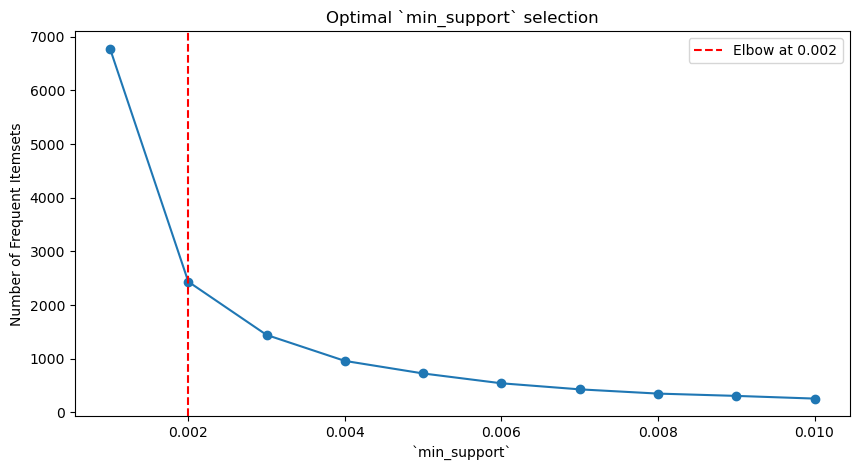

In [20]:
te = TransactionEncoder()
transactions_encoded = te.fit_transform(transactions)
transactions_df = pd.DataFrame(transactions_encoded, columns=te.columns_)

# find the optimal min_support
support_values = np.linspace(0.001, 0.01, 10)  # 0,1%-1%
results = {}

for support in support_values:
    frequent_itemsets = mlxtend_apriori(transactions_df, min_support=support, use_colnames=True)
    results[support] = len(frequent_itemsets)

elbow = find_elbow(list(results.keys()), list(results.values()))
print(f"Elbow Point: {elbow}")

plt.figure(figsize=(10, 5))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.axvline(elbow, color='r', linestyle='--', label=f'Elbow at {elbow}')
plt.xlabel('`min_support`')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Optimal `min_support` selection')
plt.legend()
plt.show()

+ If `min_support` is too **low**, many itemsets appear, including insignificant ones.
+ If `min_support` is too **high**, useful patterns may disappear.
+ The optimal `min_support` is found at the "elbow" of the graph, where the curve sharply drops and then stabilizes.

The value $0.002$ is the optimal value of `min_support`.

### Find the optimal `min_threshold` of `confidence` metric

Elbow Point: 0.2


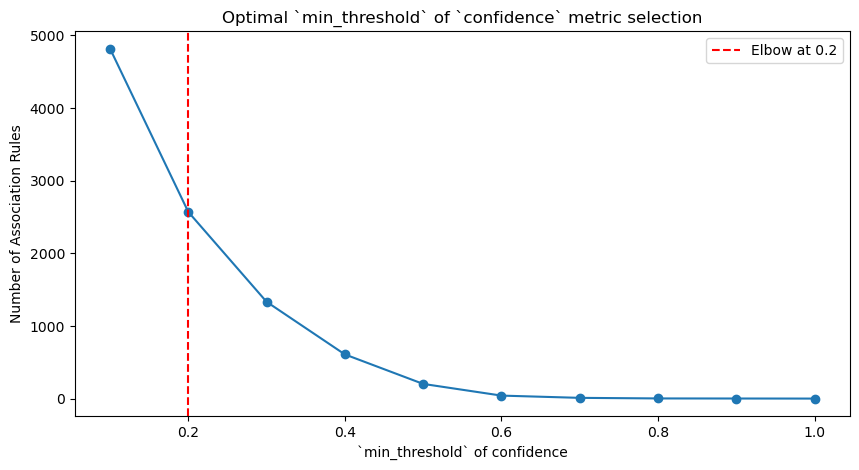

In [21]:
confidence_values = np.linspace(0.1, 1.0, 10)  # 10%-100%
results = {}

frequent_itemsets = mlxtend_apriori(transactions_df, min_support=0.002, use_colnames=True)

for confidence in confidence_values:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    results[confidence] = len(rules)

elbow = find_elbow(list(results.keys()), list(results.values()))
print(f"Elbow Point: {elbow}")

plt.figure(figsize=(10, 5))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.axvline(elbow, color='r', linestyle='--', label=f'Elbow at {elbow}')
plt.xlabel('`min_threshold` of confidence')
plt.ylabel('Number of Association Rules')
plt.title('Optimal `min_threshold` of `confidence` metric selection')
plt.legend()
plt.show()

+ If `min_threshold` of `confidence` metric is too **low**, too many weak rules.
+ If `min_threshold` of `confidence` metric is too **high**, very few (or no) rules.
+ The optimal `min_threshold` of the confident metric is found at the "elbow" of the graph, where the curve stabilizes.

The value $0.2$ is the optimal `min_threshold` of `confidence` metric.

### Find the optimal minimal value for `lift` metric

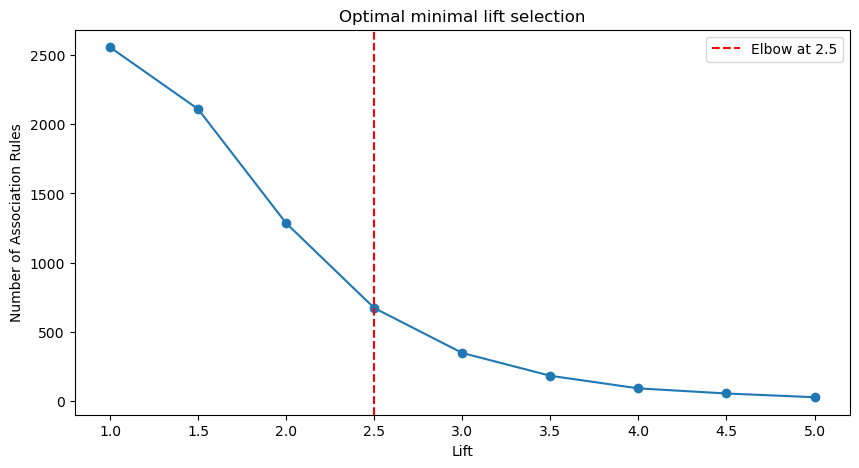

In [22]:
min_support = 0.002
min_confidence = 0.2

frequent_itemsets = mlxtend_apriori(transactions_df, min_support=min_support, use_colnames=True)

lift_values = np.linspace(1.0, 5.0, 9)
results = {}

for lift in lift_values:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=lift)
    rules = rules[rules["confidence"] >= min_confidence]
    results[lift] = len(rules)

elbow = list(results.keys())[np.argmax(np.gradient(np.gradient(list(results.values()))))]

plt.figure(figsize=(10, 5))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.axvline(elbow, color='r', linestyle='--', label=f'Elbow at {elbow}')
plt.xlabel('Lift')
plt.ylabel('Number of Association Rules')
plt.title('Optimal minimal lift selection')
plt.legend()
plt.show()

+ If the lift metric is too **low**, too many weak or random rules.
+ If the lift metric is too **high**, very few (or no) rules.
+ The optimal minimal of the lift metric is found at the "elbow" of the graph, where the curve stabilizes.
  
The value $2.5$ is the optimal minimal value of lift metric.

### Inspect the well organized rules

In [23]:
min_support=0.002
min_confidence=0.2
min_lift=2.5

frequent_itemsets = mlxtend_apriori(transactions_df, min_support=min_support, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# filter by min_lift
rules.loc[rules['lift'] >= min_lift, :]

,antecedents,consequents,support,confidence,lift
0,almonds,burgers,0.005199,0.254902,2.923577
19,bacon,ground beef,0.002133,0.246154,2.505292
21,bacon,pancakes,0.002133,0.246154,2.589621
26,barbecue sauce,turkey,0.002533,0.234568,3.751586
34,blueberries,ground beef,0.002400,0.260870,2.655065
79,extra dark chocolate,chicken,0.002800,0.233333,3.889407
80,light cream,chicken,0.004533,0.290598,4.843951
176,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
177,pasta,escalope,0.005866,0.372881,4.700812
179,extra dark chocolate,olive oil,0.002666,0.222222,3.374269


In [24]:
# top 10 rules
rules.loc[rules['lift'] >= min_lift, :].nlargest(n=10, columns=['lift'])

,antecedents,consequents,support,confidence,lift
211,fromage blanc,honey,0.003333,0.245098,5.164271
80,light cream,chicken,0.004533,0.290598,4.843951
177,pasta,escalope,0.005866,0.372881,4.700812
335,pasta,shrimp,0.005066,0.322034,4.506672
331,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
79,extra dark chocolate,chicken,0.002800,0.233333,3.889407
252,tomato sauce,ground beef,0.005333,0.377358,3.840659
176,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
26,barbecue sauce,turkey,0.002533,0.234568,3.751586
179,extra dark chocolate,olive oil,0.002666,0.222222,3.374269
